In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.special import factorial
from collections import Counter
from matplotlib import pyplot as plt
from itertools import product, combinations_with_replacement

# Question 1a

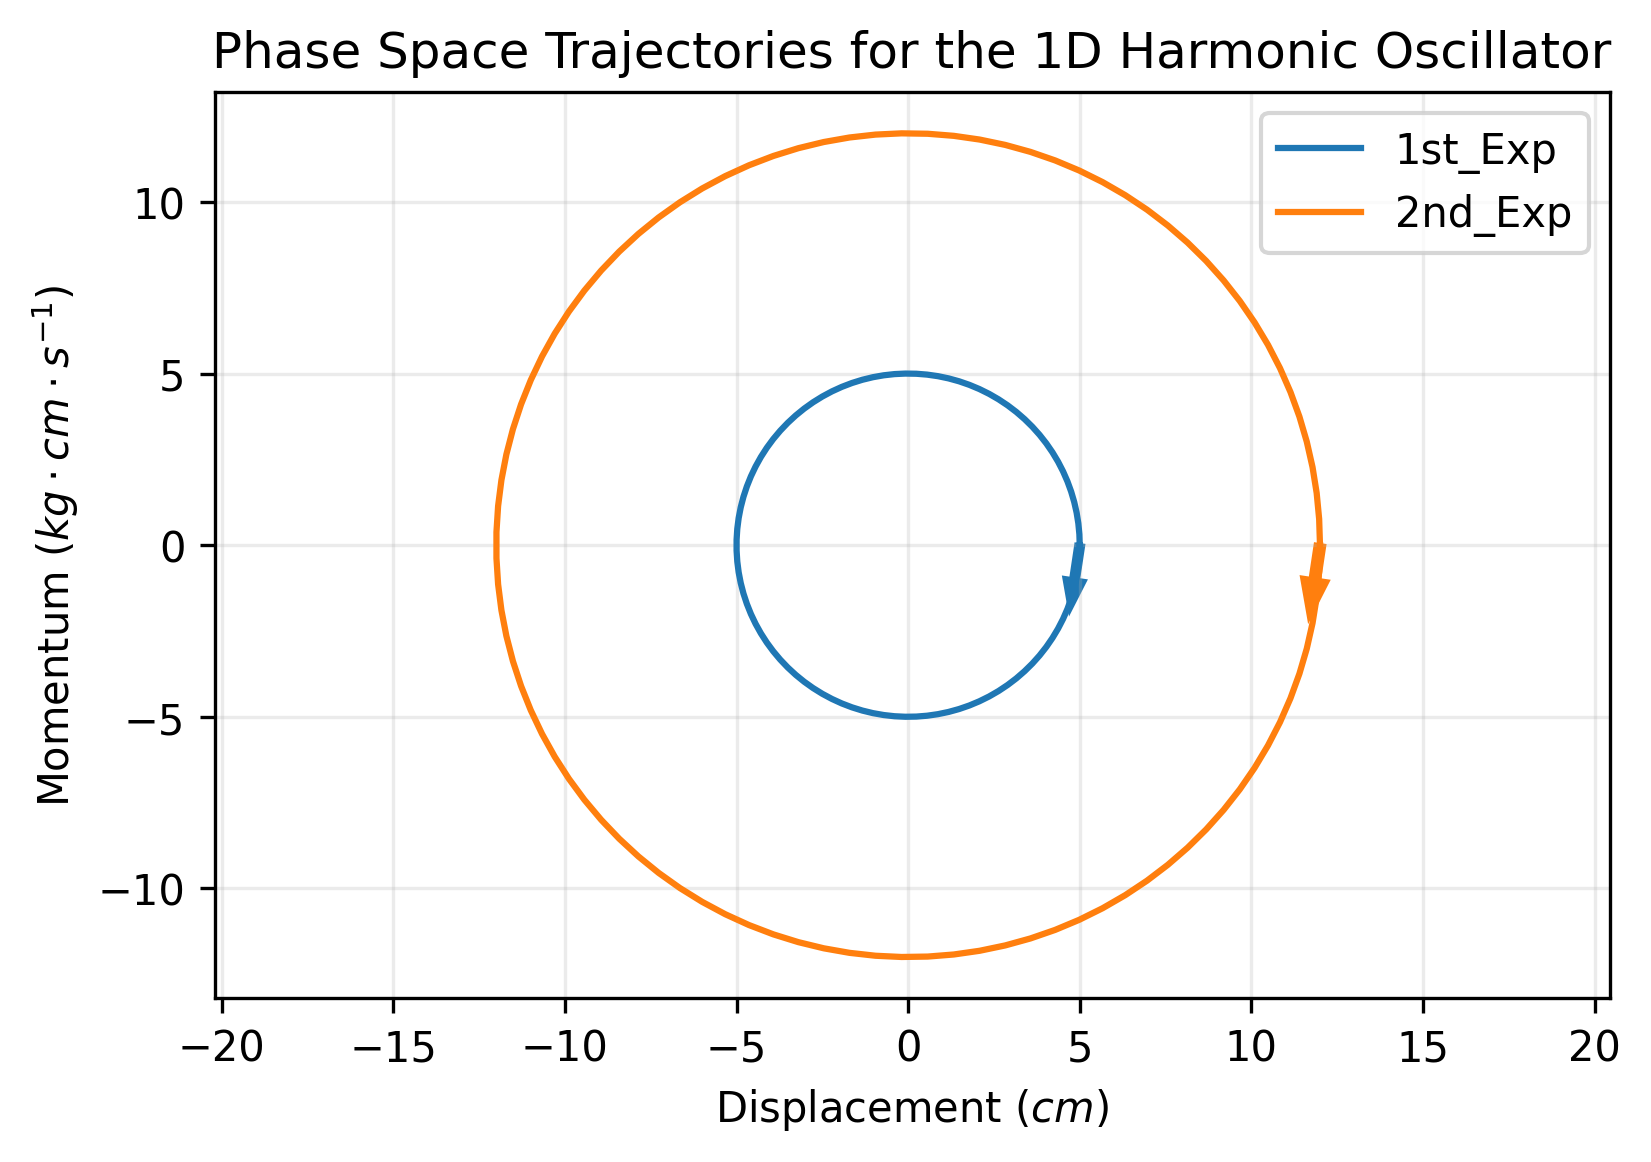

In [2]:
# Samples of timesteps
q1_t = np.linspace(0, 2*np.pi, 100)

# Displacement and momentum of the first experiment
q1_d1 = 5 * np.cos(q1_t)
q1_p1 = 5 * np.sin(q1_t)

# Displacement and momentum of the second experiment
q1_d2 = 12 * np.cos(q1_t)
q1_p2 = 12 * np.sin(q1_t)

# Plot the points
fig, ax = plt.subplots()
fig.dpi = 300

ax.plot(q1_d1, q1_p1, label="1st_Exp")
ax.arrow(q1_d1[0], q1_p1[0], -0.15, -1, width=0.2, color='#1f77b4')

ax.plot(q1_d2, q1_p2, label="2nd_Exp")
ax.arrow(q1_d2[0], q1_p2[0], -0.15, -1, width=0.25, color='#ff7f0e')

ax.axis("equal")
ax.legend()
ax.grid(alpha=0.25)
ax.set_xlabel(r"Displacement $(cm)$")
ax.set_ylabel(r"Momentum $(kg \cdot cm \cdot s^{-1})$")
ax.set_title("Phase Space Trajectories for the 1D Harmonic Oscillator")

plt.savefig("Question1.png", dpi=200)
plt.show()

# Question 2a

In [3]:
# Generate all combinations of nx, ny, nz for 1-4
q2_qn1 = np.array(list(product(range(1, 4), repeat=3)))
# Compute energies for these combinations
q2_energy1 = (q2_qn1 ** 2).sum(axis=1)
# Counter the number of combinations with the same energy
q2_ec1 = Counter(q2_energy1)
# Sort and display
q2_df1 = pd.DataFrame([q2_ec1.keys(), q2_ec1.values()], index=["energy", "degeneracy"]).T.sort_values(by="energy").reset_index(drop=True).iloc[:6, :]
q2_df1

,energy,degeneracy
0,3,1
1,6,3
2,9,3
3,11,3
4,12,1
5,14,6


# Question 2b

In [4]:
# Generate all combinations of nx1, ny1, nz1, nx2, ny2, nz2 for 1-3
q2_qn2 = np.array(list(product(range(1, 3), repeat=6)))
# Compute energies for these combinations
q2_energy2 = (q2_qn2 ** 2).sum(axis=1)
# Counter the number of combinations with the same energy
q2_ec2 = Counter(q2_energy2)
# Sort and display
q2_df2 = pd.DataFrame([q2_ec2.keys(), q2_ec2.values()], index=["energy", "degeneracy"]).T.sort_values(by="energy").reset_index(drop=True).iloc[:6, :]
q2_df2

,energy,degeneracy
0,6,1
1,9,6
2,12,15
3,15,20
4,18,15
5,21,6


# Question 2c

In [5]:
# Compute the factor of energy difference
q2_energy_scaler = 1/(1.5 ** (2/3))
q2_energy_scaler

0.763142828368888

In [6]:
# Compute the new energies
(q2_energy_scaler * q2_df1.energy).round(4)

0     2.2894
1     4.5789
2     6.8683
3     8.3946
4     9.1577
5    10.6840
Name: energy, dtype: float64

# Question 2d

In [7]:
q2_h = 6.62607015e-34 # J * s
q2_m = 83.80 * 1.660e-27 # kg
q2_v = 0.1 ** 3 # m^3
q2_a = (q2_h ** 2) / (8 * q2_m * (q2_v ** (2/3))) # J
q2_a

3.9452085459428113e-41

In [8]:
q2_e1, q2_e2 = 3, 6
q2_gap = q2_a * (q2_e2 - q2_e1)
q2_gap

1.1835625637828433e-40

In [9]:
q2_k = 1.380649e-23 # J K-1
q2_T = 300 # K
q2_ke = (3 * q2_k * q2_T) / 2 # J
q2_ke

6.2129205000000004e-21

# Question 3a

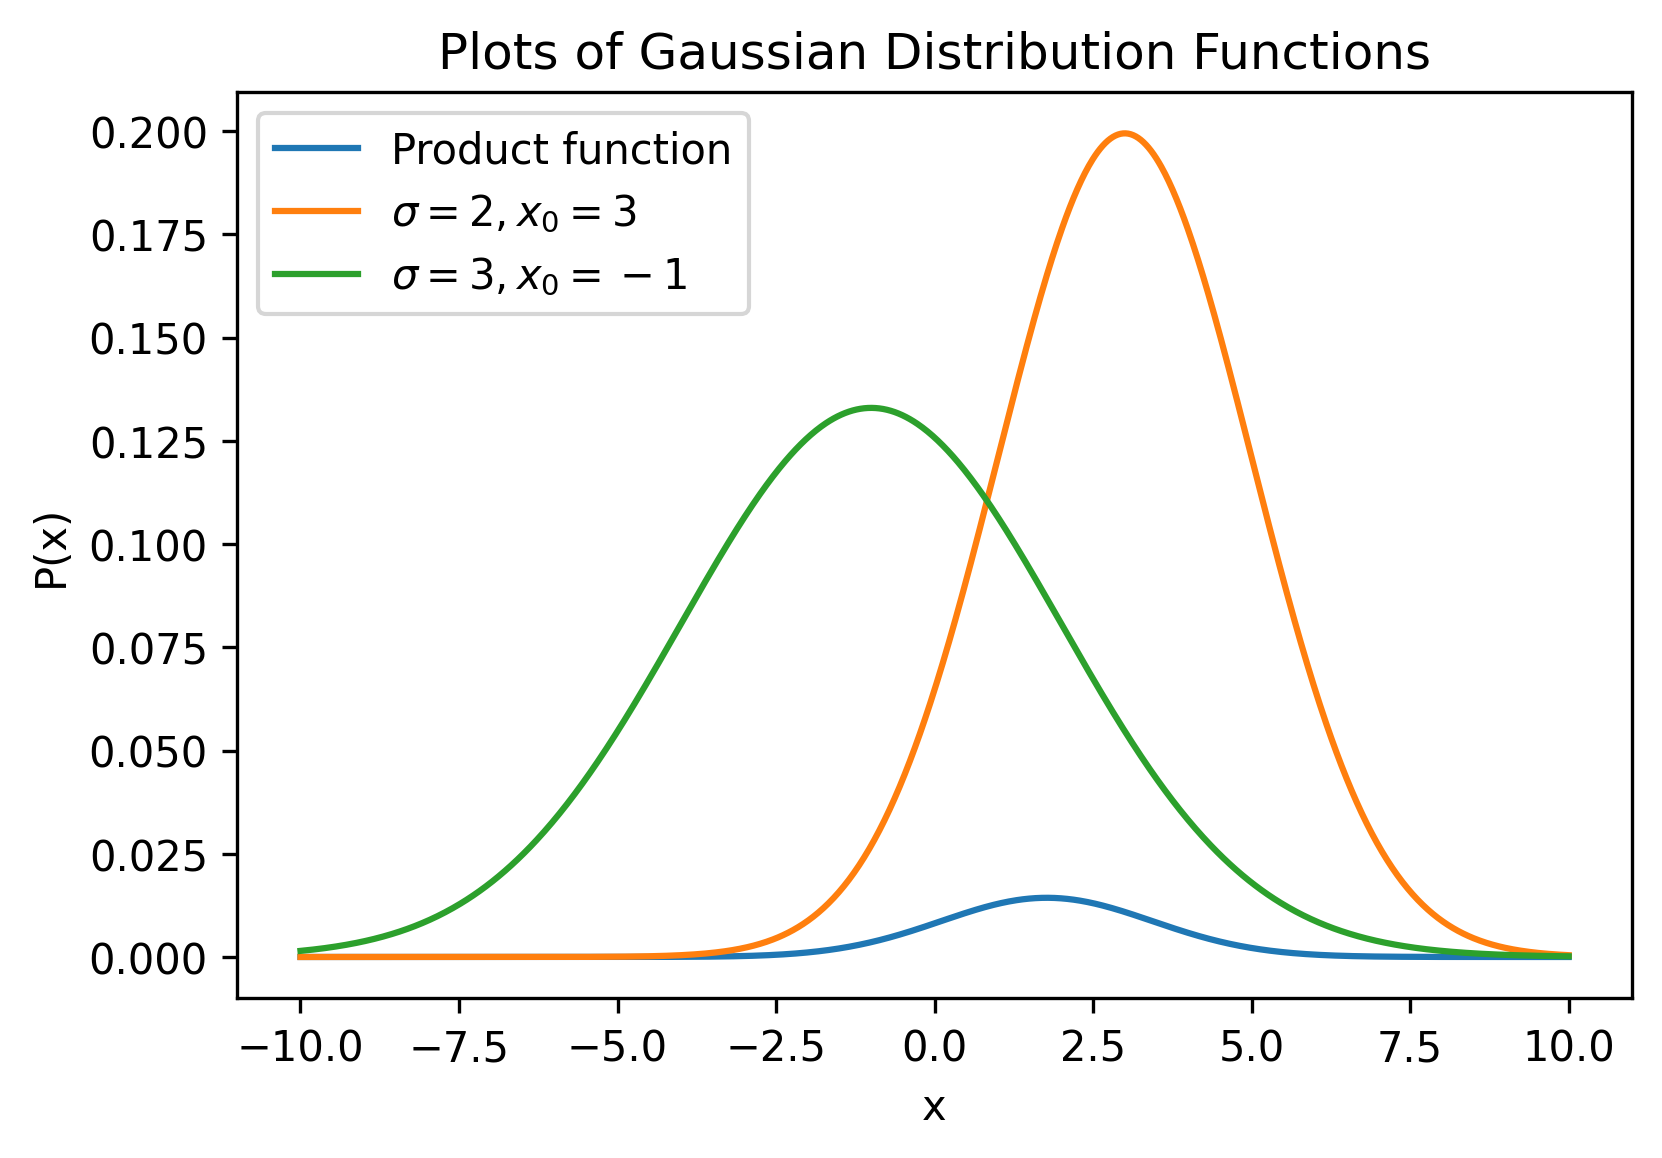

In [10]:
# Sample points from [-10, 10]
q3_x = np.linspace(-10, 10, 1000)
# Compute points for the first Gaussian
q3_g1 = norm.pdf(q3_x, 3, 2)
# Compute points for the second Gaussian
q3_g2 = norm.pdf(q3_x, -1, 3)
# Compute the product values
q3_g3 = q3_g1 * q3_g2

# Plot the points
fig, ax = plt.subplots()
fig.dpi = 300

ax.plot(q3_x, q3_g3, label="Product function")
ax.plot(q3_x, q3_g1, label=r"$\sigma=2, x_0=3$")
ax.plot(q3_x, q3_g2, label=r"$\sigma=3, x_0=-1$")

ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("P(x)")
ax.set_title("Plots of Gaussian Distribution Functions")

plt.savefig("Question3a.png", dpi=200)

plt.show()

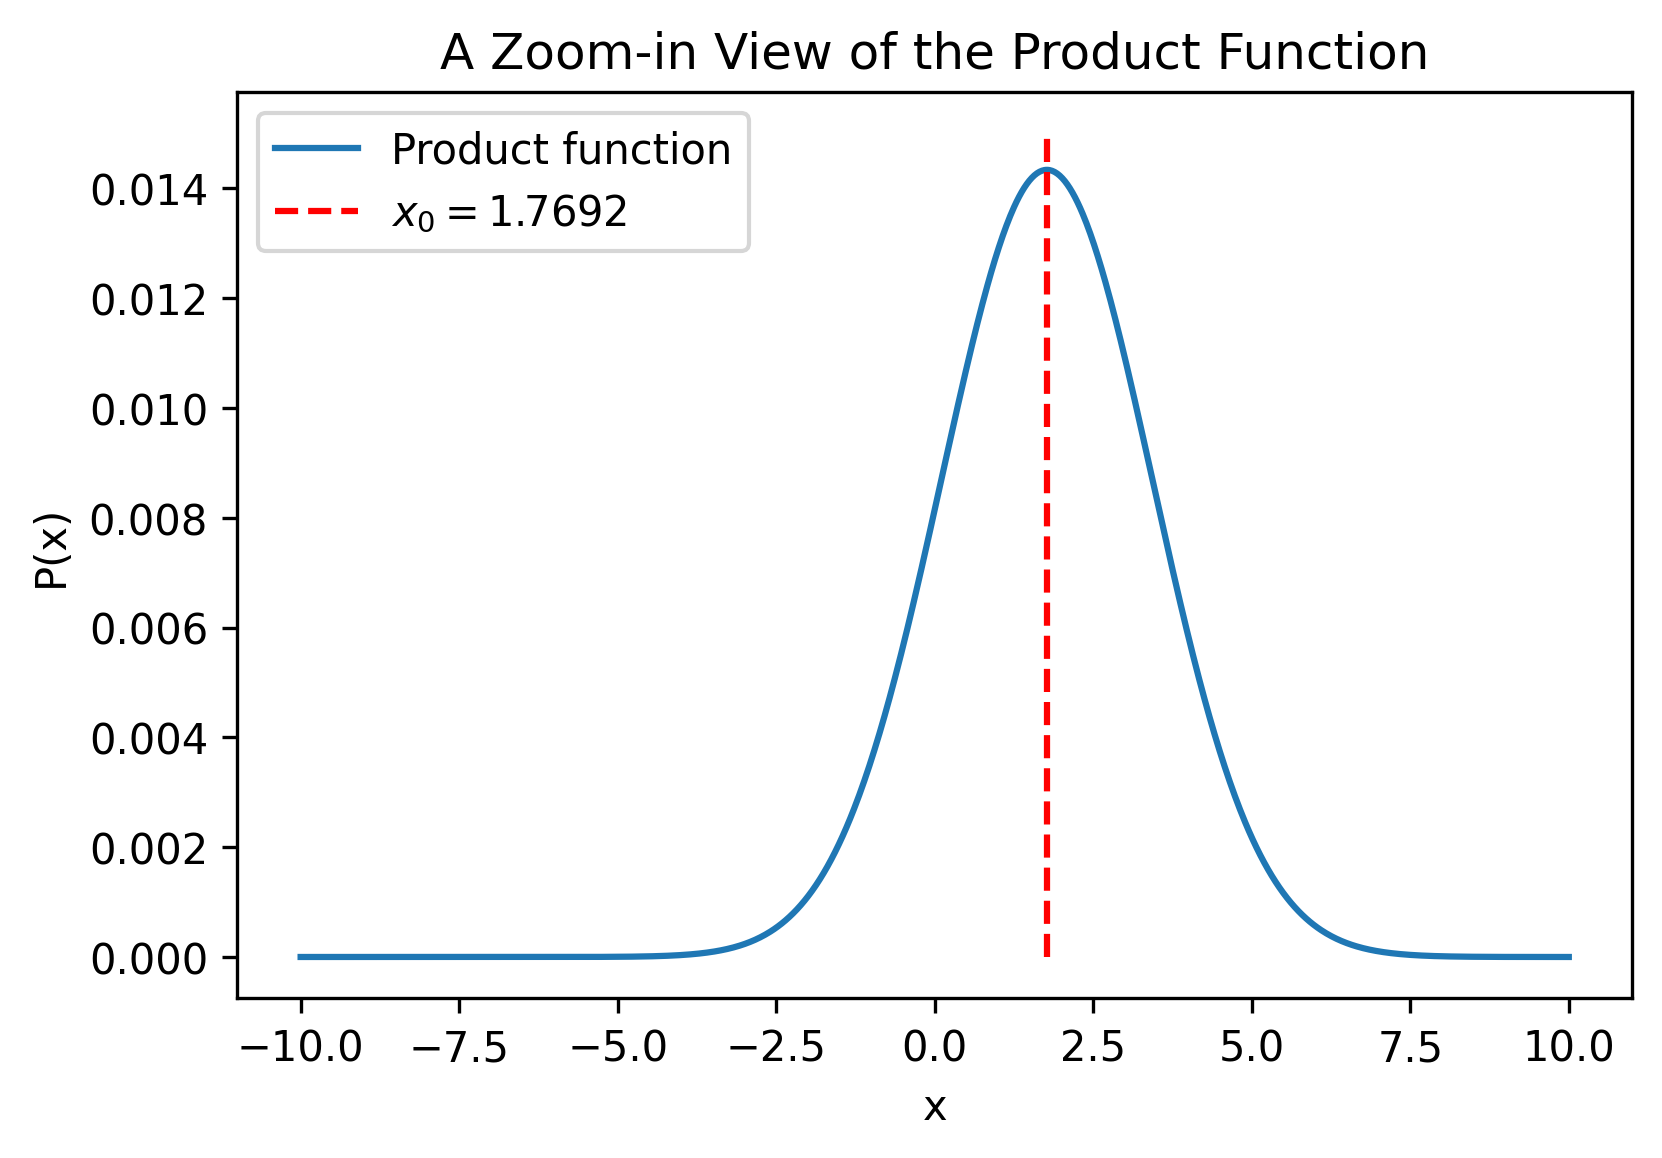

In [11]:
# Plot the product function individually
fig, ax = plt.subplots()
fig.dpi = 300

ax.plot(q3_x, q3_g3, label="Product function")
ax.vlines(23/13, 0, 0.015, linestyles="dashed", colors="r", label=r"$x_0=1.7692$")

ax.legend(loc="upper left")
ax.set_xlabel("x")
ax.set_ylabel("P(x)")
ax.set_title("A Zoom-in View of the Product Function")

plt.savefig("Question3b.png", dpi=200)
plt.show()

# Question 4

In [12]:
def q4_prob_fn(n, e_total):
    # Generate all combinations with n molecules in e_total levels
    options = np.array(list(combinations_with_replacement(range(e_total+1), n)))
    # Filter out the ones with the proper total energy
    picked = options[options.sum(axis=1) == e_total]
    # Rearrange into proper distribution format
    distros = np.zeros([len(picked), e_total+1], dtype=int)
    for i, state in enumerate(picked):
        for j, count in Counter(state).items():
            distros[i, j] = count
    # Compute the weight of each distribution
    w = (factorial(n, exact=True) // factorial(distros, exact=True).prod(axis=1)).reshape(-1, 1)
    # Compute the probability of each distribution
    p_distro = w / w.sum()
    # Compute the normalized probability of occupying each energy level
    w_total = (distros * w).sum(axis=0)
    p_elv = w_total / w_total.sum()
    # Organize the distributions and degeneracy
    df = pd.DataFrame(distros, columns=[f"n{i}" for i in range(e_total+1)], index=[f"d{i}" for i in range(1, distros.shape[0]+1)])
    df.insert(e_total+1, "Degeneracy", w)
    return df, p_elv

# Question 4a

In [13]:
q4_df1, q4_p_elv1 = q4_prob_fn(6, 6)
q4_df1

,n0,n1,n2,n3,n4,n5,n6,Degeneracy
d1,5,0,0,0,0,0,1,6
d2,4,1,0,0,0,1,0,30
d3,4,0,1,0,1,0,0,30
d4,4,0,0,2,0,0,0,15
d5,3,2,0,0,1,0,0,60
d6,3,1,1,1,0,0,0,120
d7,3,0,3,0,0,0,0,20
d8,2,3,0,1,0,0,0,60
d9,2,2,2,0,0,0,0,90
d10,1,4,1,0,0,0,0,30


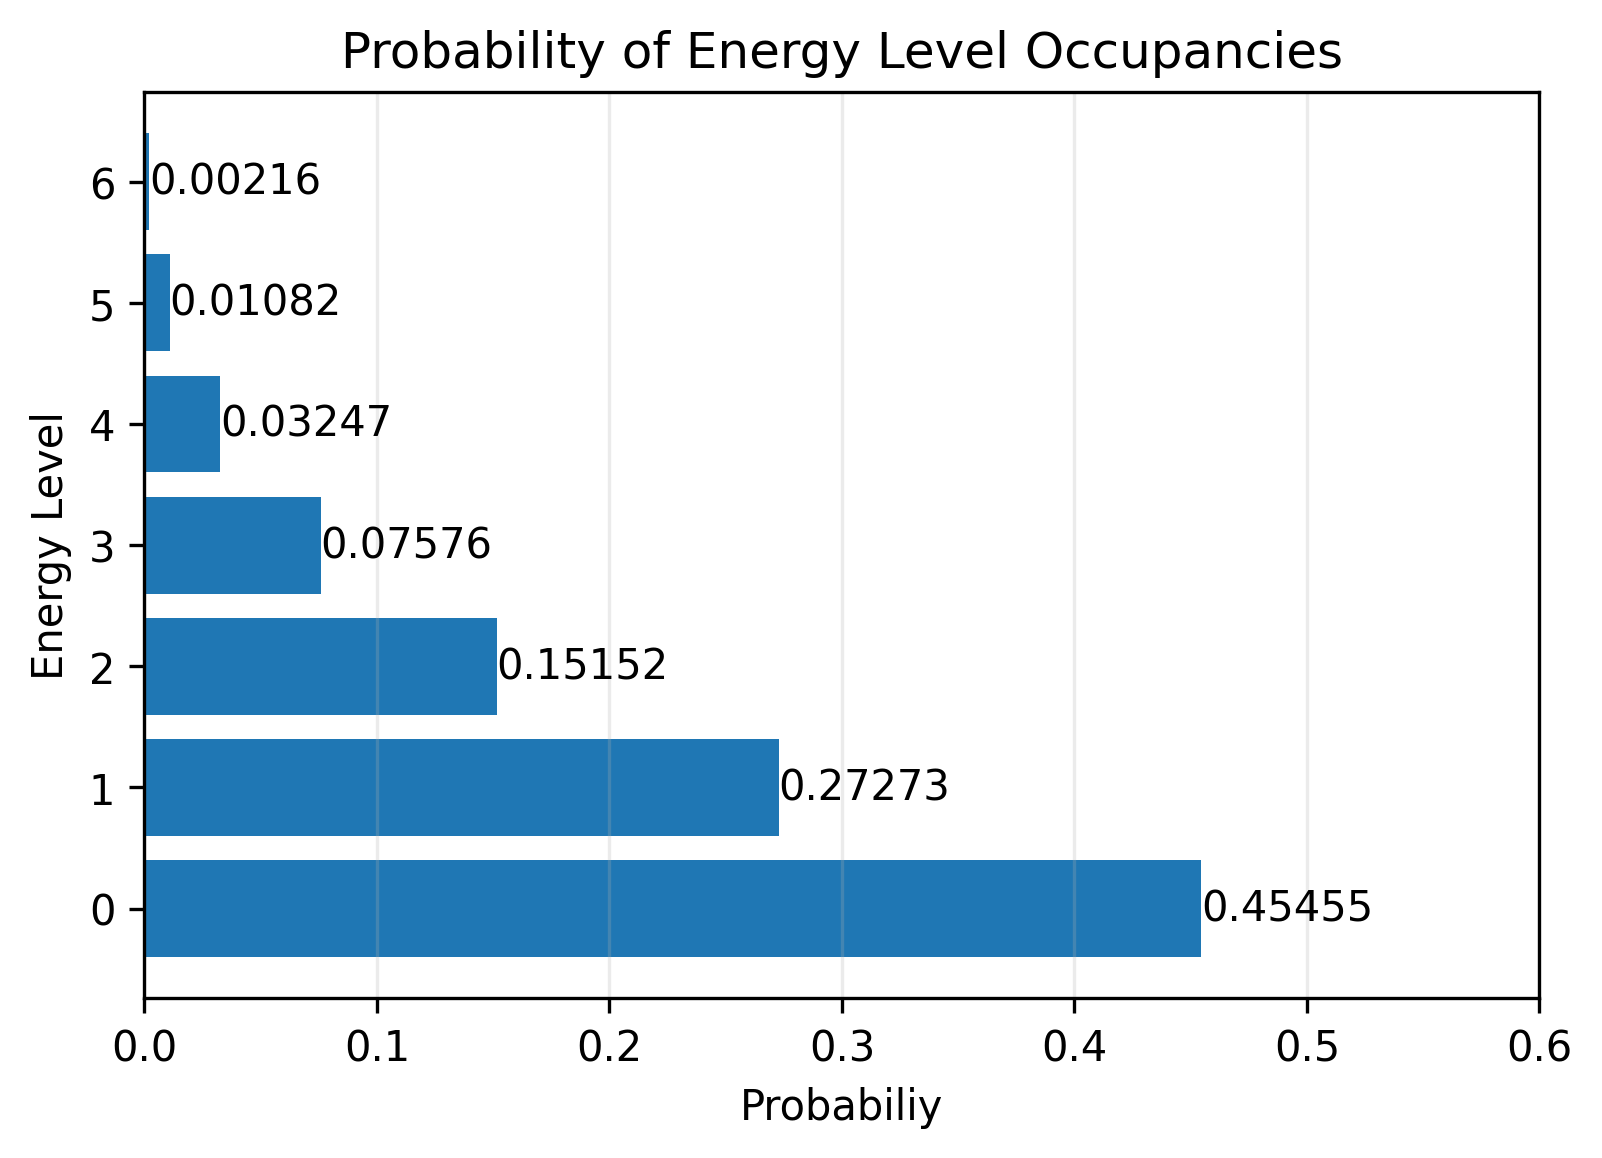

In [14]:
# Plot the probability of occupancies
fig, ax = plt.subplots()
fig.dpi = 300

bars = ax.barh(np.arange(len(q4_p_elv1)), q4_p_elv1.round(5))
ax.bar_label(bars)
ax.set_xlim(right=0.6)

ax.grid(alpha=0.25, axis="x")
ax.set_xlabel("Probabiliy")
ax.set_ylabel("Energy Level")
ax.set_title("Probability of Energy Level Occupancies")

plt.savefig("Question4a.png", dpi=200)
plt.show()

# Question 4b

In [15]:
q4_df2, q4_p_elv2 = q4_prob_fn(6, 9)
q4_df2

,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,Degeneracy
d1,5,0,0,0,0,0,0,0,0,1,6
d2,4,1,0,0,0,0,0,0,1,0,30
d3,4,0,1,0,0,0,0,1,0,0,30
d4,4,0,0,1,0,0,1,0,0,0,30
d5,4,0,0,0,1,1,0,0,0,0,30
d6,3,2,0,0,0,0,0,1,0,0,60
d7,3,1,1,0,0,0,1,0,0,0,120
d8,3,1,0,1,0,1,0,0,0,0,120
d9,3,1,0,0,2,0,0,0,0,0,60
d10,3,0,2,0,0,1,0,0,0,0,60


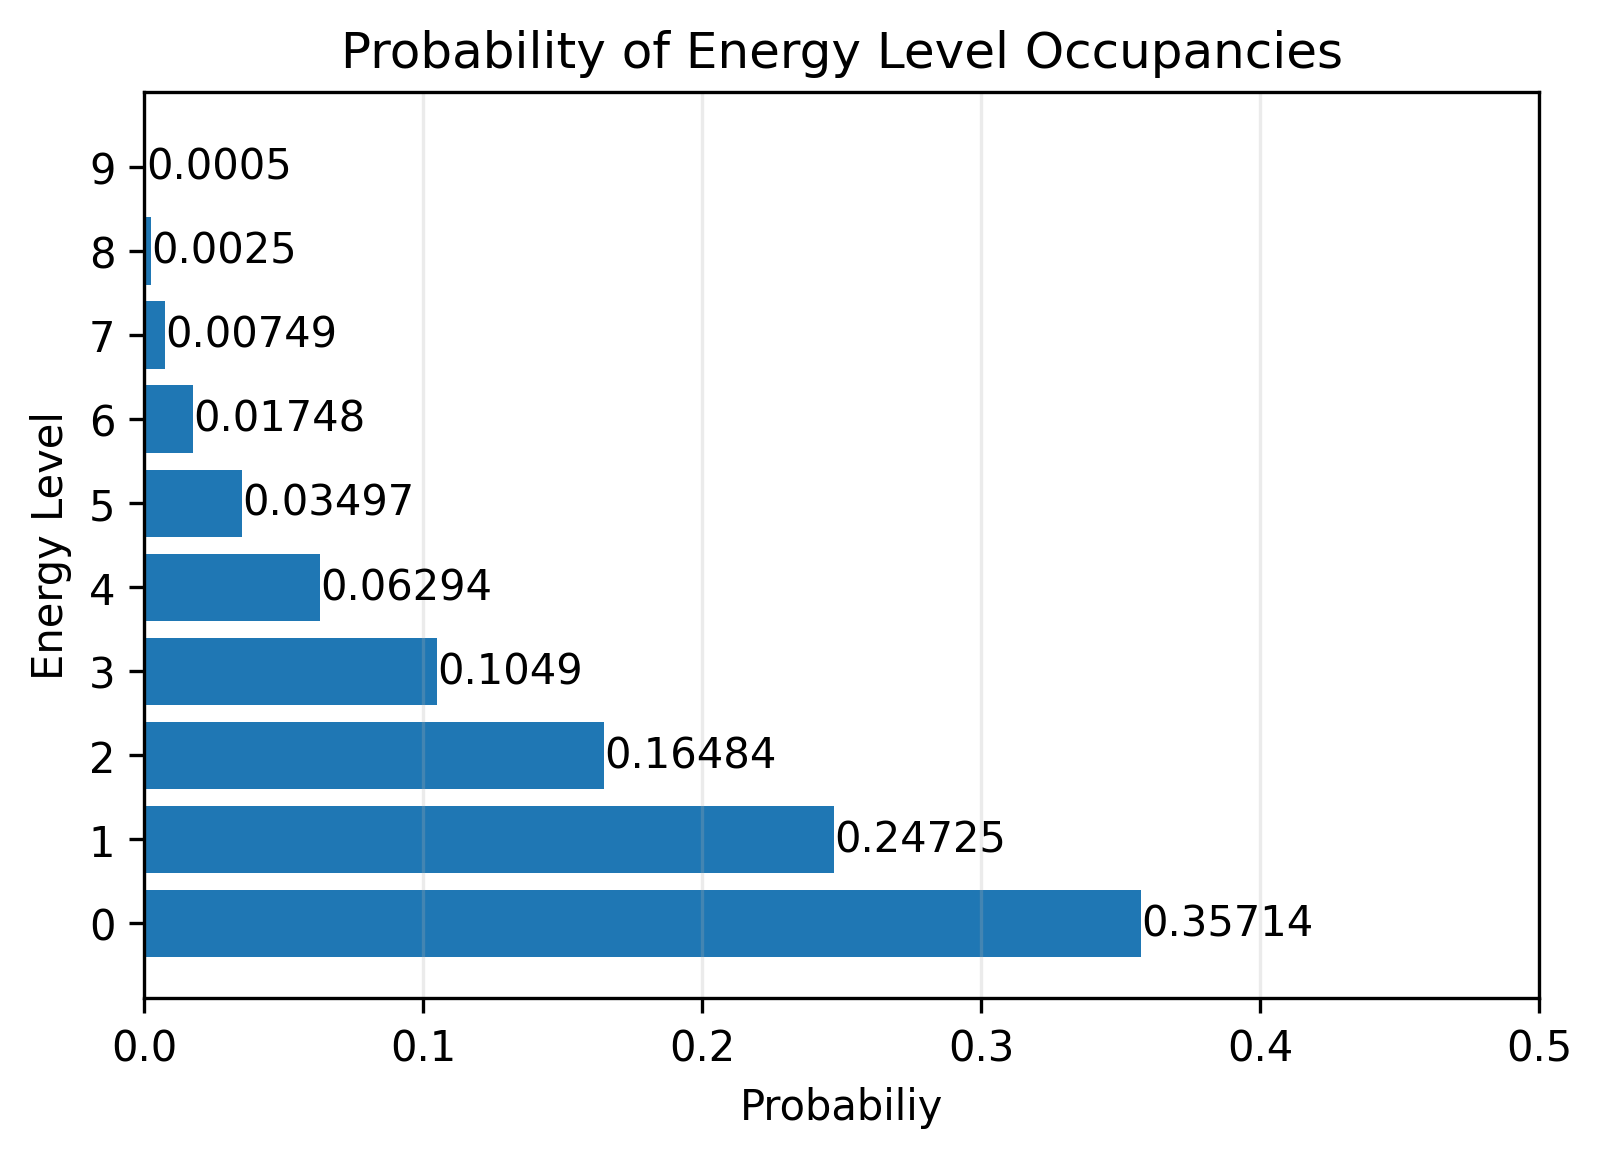

In [16]:
# Plot the probability of occupancies
fig, ax = plt.subplots()
fig.dpi = 300

bars = ax.barh(np.arange(len(q4_p_elv2)), q4_p_elv2.round(5))
ax.bar_label(bars)
ax.set_xlim(right=0.5)
ax.set_yticks(np.arange(len(q4_p_elv2)))

ax.grid(alpha=0.25, axis="x")
ax.set_xlabel("Probabiliy")
ax.set_ylabel("Energy Level")
ax.set_title("Probability of Energy Level Occupancies")

plt.savefig("Question4b.png", dpi=200)
plt.show()

# Question 5

In [17]:
q5_x = np.linspace(0, 15, 1000)

# Question 5a

In [18]:
# Probability function for energy
def pne_a(n, e_kt):
    ## e_kt = E/kT
    a = 1.5 * n - 1
    return (1 / factorial(a)) * (e_kt ** a) * np.exp(-e_kt)

In [19]:
# For one molecule system
q5_e1_a = pne_a(1, q5_x)  # all energies
q5_e1_ep = 1/2            # most probable energy
p5_e1_ep = pne_a(1, 1/2)  # probability of most probable energy
q5_e1_avg = 3/2           # average energy
p5_e1_avg = pne_a(1, 3/2) # probability of average energy

# For two molecule system
q5_e2_a = pne_a(2, q5_x)  # all energies
q5_e2_ep = 2              # most probable energy
p5_e2_ep = pne_a(2, 2)    # probability of most probable energy
q5_e2_avg = 3             # average energy
p5_e2_avg = pne_a(2, 3)   # probability of average energy

# For for molecule system
q5_e4_a = pne_a(4, q5_x)  # all energies
q5_e4_ep = 5              # most probable energy
p5_e4_ep = pne_a(4, 5)    # probability of most probable energy
q5_e4_avg = 6             # average energy
p5_e4_avg = pne_a(4, 6)   # probability of average energy

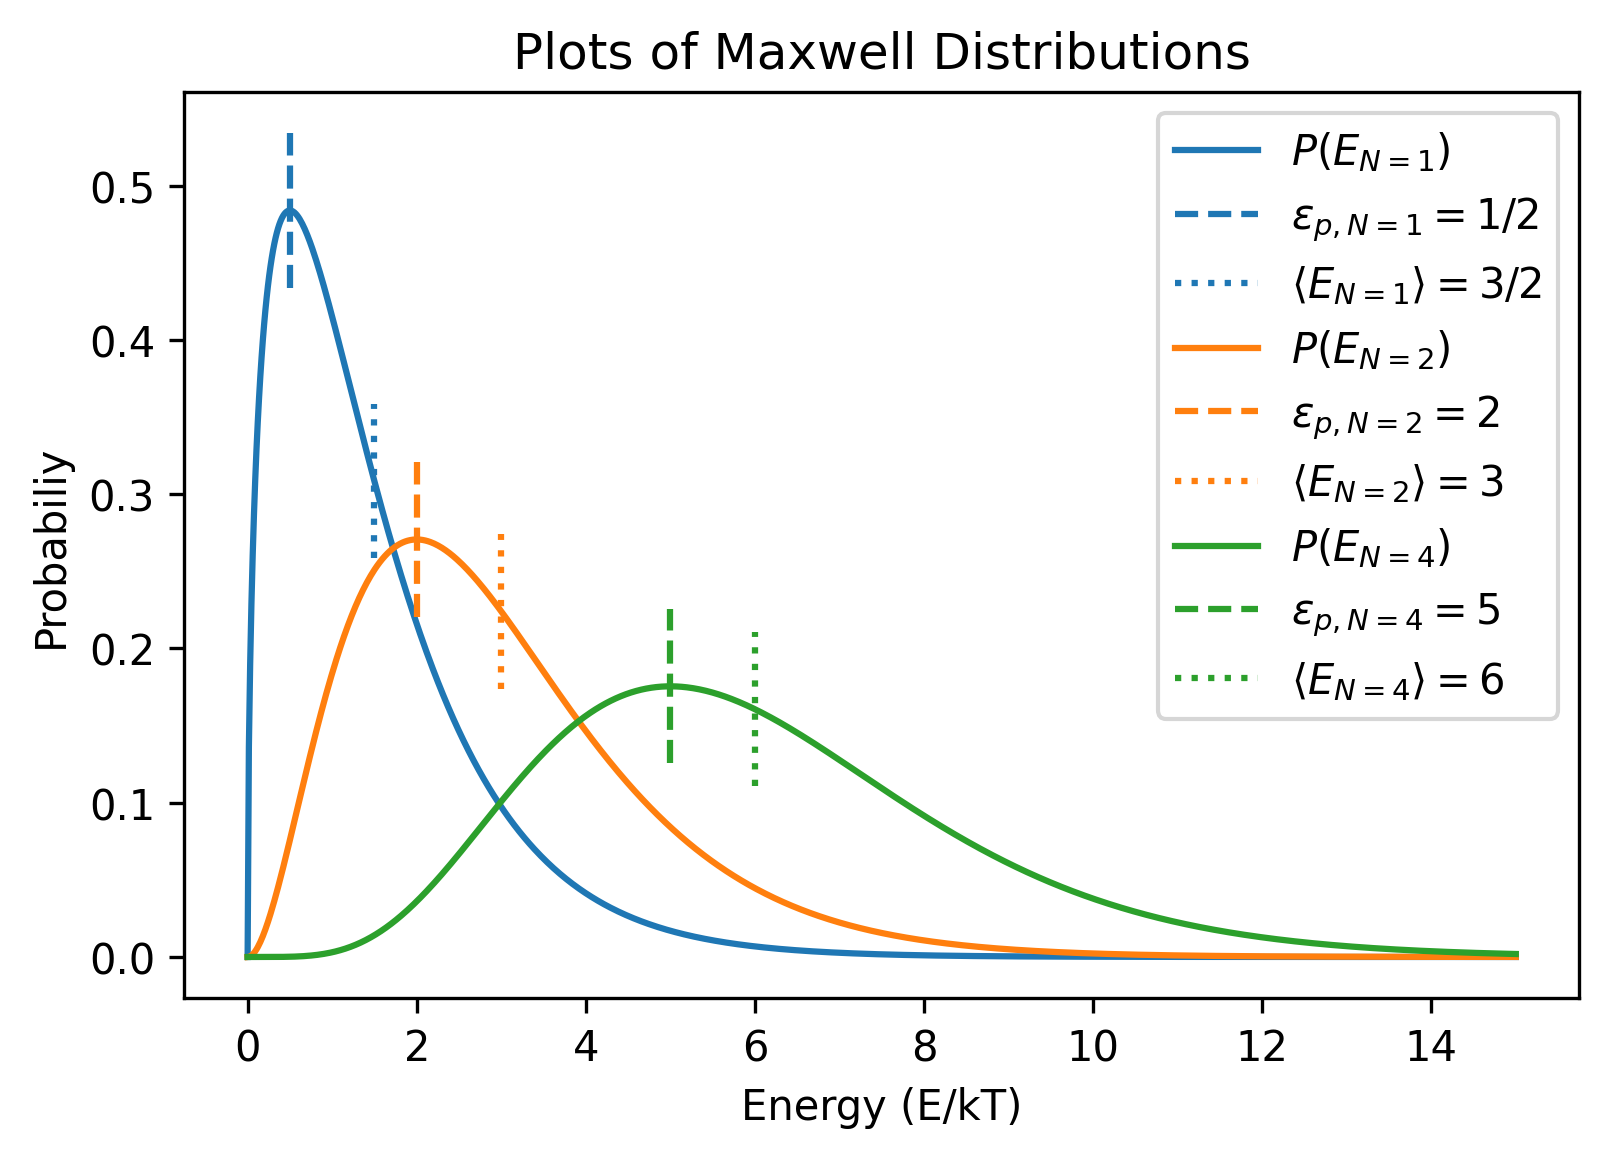

In [20]:
fig, ax = plt.subplots()
fig.dpi = 300

ax.plot(q5_x, q5_e1_a, label=r"$P(E_{N=1})$")
ax.vlines(q5_e1_ep, p5_e1_ep-0.05, p5_e1_ep+0.05, linestyles="dashed", colors='#1f77b4', label=r"$\varepsilon_{p,N=1}=1/2$")
ax.vlines(q5_e1_avg, p5_e1_avg-0.05, p5_e1_avg+0.05, linestyles="dotted", colors='#1f77b4', label=r"$\langle E_{N=1} \rangle = 3/2$")

ax.plot(q5_x, q5_e2_a, label=r"$P(E_{N=2})$")
ax.vlines(q5_e2_ep, p5_e2_ep-0.05, p5_e2_ep+0.05, linestyles="dashed", colors='#ff7f0e', label=r"$\varepsilon_{p,N=2}=2$")
ax.vlines(q5_e2_avg, p5_e2_avg-0.05, p5_e2_avg+0.05, linestyles="dotted", colors='#ff7f0e', label=r"$\langle E_{N=2} \rangle = 3$")

ax.plot(q5_x, q5_e4_a, label=r"$P(E_{N=4})$")
ax.vlines(q5_e4_ep, p5_e4_ep-0.05, p5_e4_ep+0.05, linestyles="dashed", colors='#2ca02c', label=r"$\varepsilon_{p,N=4}=5$")
ax.vlines(q5_e4_avg, p5_e4_avg-0.05, p5_e4_avg+0.05, linestyles="dotted", colors='#2ca02c', label=r"$\langle E_{N=4} \rangle = 6$")

ax.legend()
ax.set_xlabel("Energy (E/kT)")
ax.set_ylabel("Probabiliy")
ax.set_title("Plots of Maxwell Distributions")

plt.savefig("Question5a.png", dpi=200)
plt.show()

# Question 5b

In [21]:
# Probability function for reduced energy
def pne_b(n, e_star):
    ## e_star = E/E_p
    a = 1.5 * n - 1
    return ((a ** (a+1)) / factorial(a)) * (e_star ** a) * np.exp(-a * e_star)

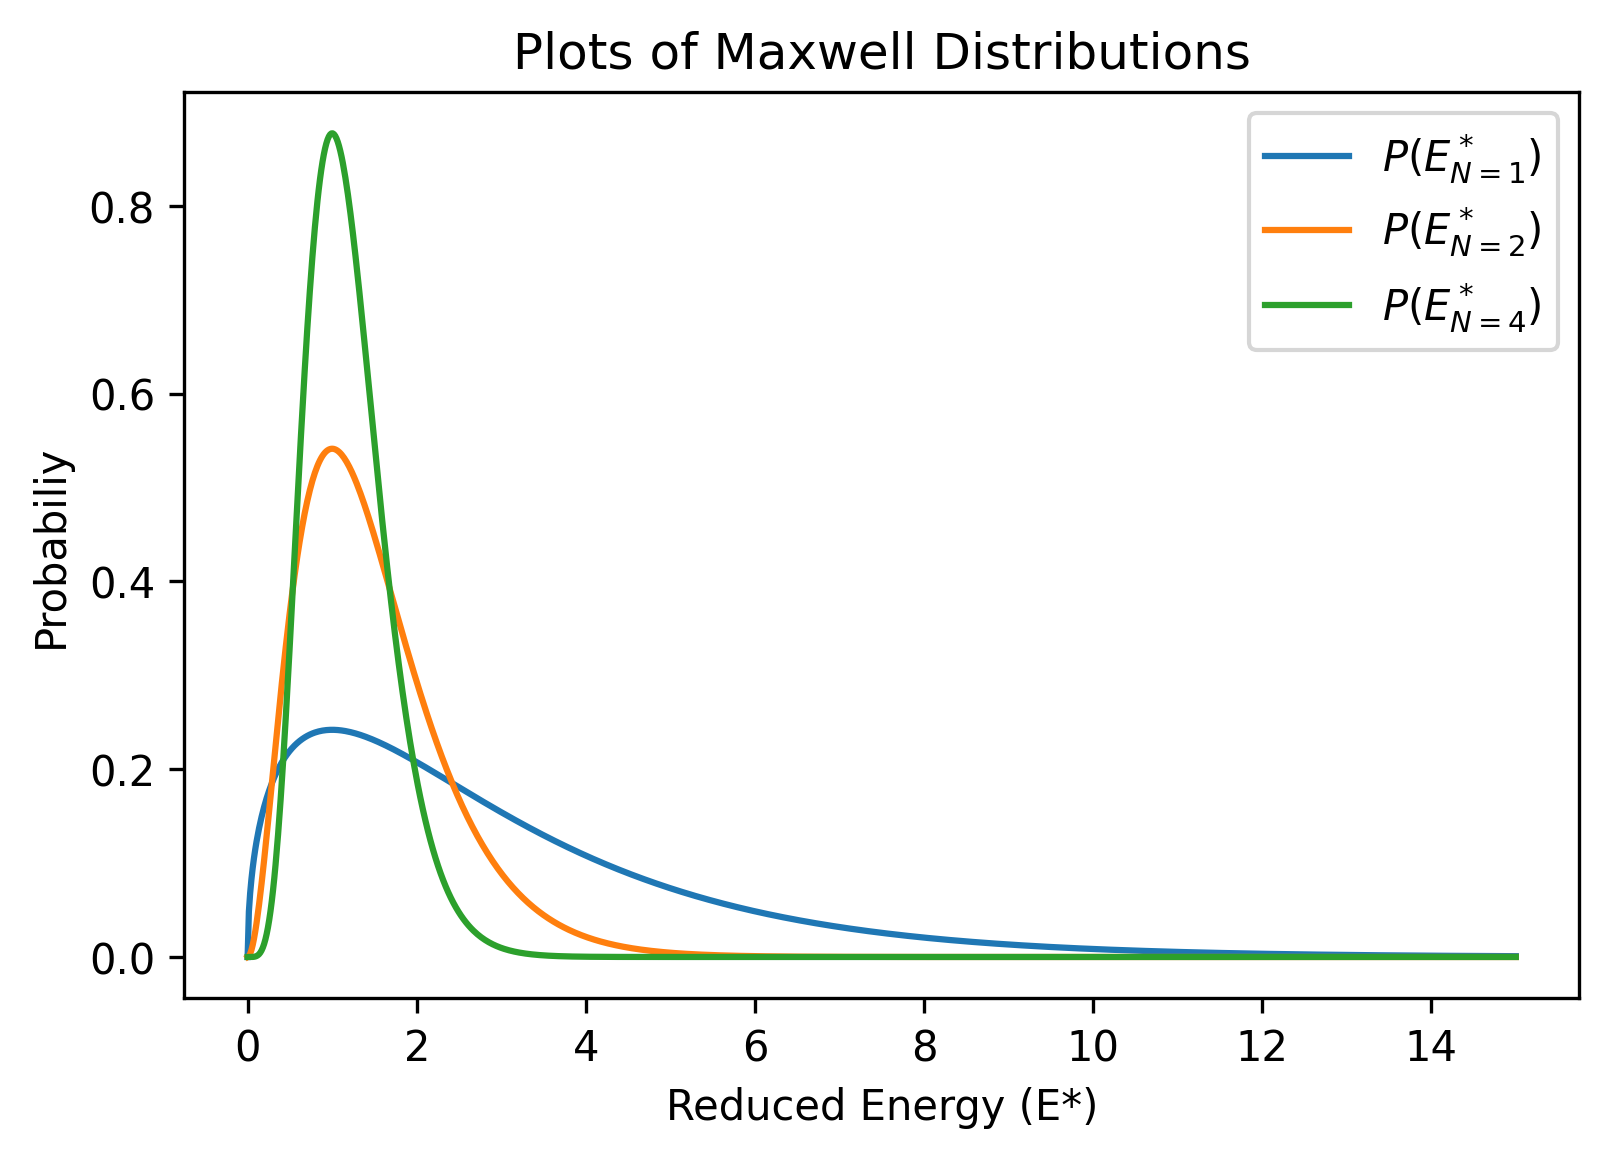

In [22]:
fig, ax = plt.subplots()
fig.dpi = 300

ax.plot(q5_x, pne_b(1, q5_x), label=r"$P(E^*_{N=1})$")
ax.plot(q5_x, pne_b(2, q5_x), label=r"$P(E^*_{N=2})$")
ax.plot(q5_x, pne_b(4, q5_x), label=r"$P(E^*_{N=4})$")

ax.legend()
ax.set_xlabel("Reduced Energy (E*)")
ax.set_ylabel("Probabiliy")
ax.set_title("Plots of Maxwell Distributions")

plt.savefig("Question5b.png", dpi=200)
plt.show()

# Question 5c

In [23]:
# Probability of twice the most probable energy
p5_e1_2ep = pne_a(1, 1)  # For one molecule system
p5_e2_2ep = pne_a(2, 4)  # For two molecule system
p5_e4_2ep = pne_a(4, 10) # For for molecule system

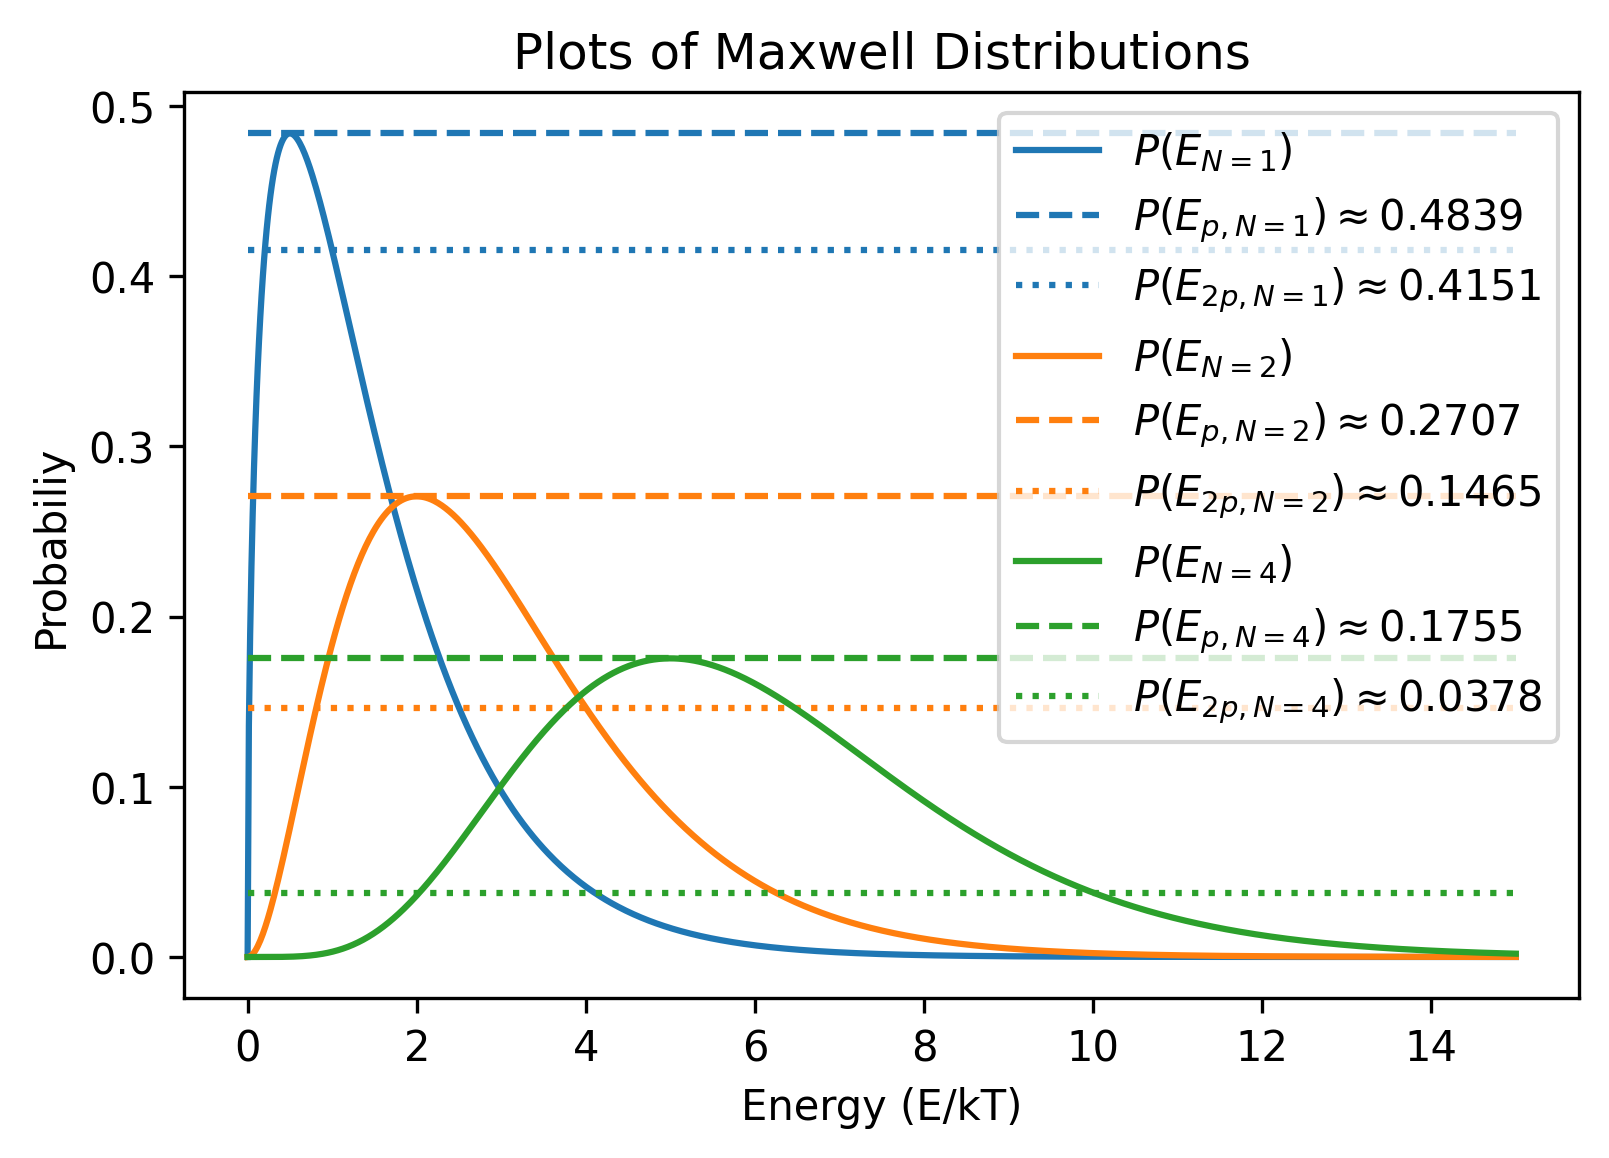

In [24]:
fig, ax = plt.subplots()
fig.dpi = 300

ax.plot(q5_x, q5_e1_a, label=r"$P(E_{N=1})$")
ax.hlines(p5_e1_ep, 0, 15, linestyles="dashed", colors='#1f77b4', label=r"$P(E_{p,N=1}) \approx 0.4839$")
ax.hlines(p5_e1_2ep, 0, 15, linestyles="dotted", colors='#1f77b4', label=r"$P(E_{2p,N=1}) \approx 0.4151$")

ax.plot(q5_x, q5_e2_a, label=r"$P(E_{N=2})$")
ax.hlines(p5_e2_ep, 0, 15, linestyles="dashed", colors='#ff7f0e', label=r"$P(E_{p,N=2}) \approx 0.2707$")
ax.hlines(p5_e2_2ep, 0, 15, linestyles="dotted", colors='#ff7f0e', label=r"$P(E_{2p,N=2}) \approx 0.1465$")

ax.plot(q5_x, q5_e4_a, label=r"$P(E_{N=4})$")
ax.hlines(p5_e4_ep, 0, 15, linestyles="dashed", colors='#2ca02c', label=r"$P(E_{p,N=4}) \approx 0.1755$")
ax.hlines(p5_e4_2ep, 0, 15, linestyles="dotted", colors='#2ca02c', label=r"$P(E_{2p,N=4}) \approx 0.0378$")

ax.legend()
ax.set_xlabel("Energy (E/kT)")
ax.set_ylabel("Probabiliy")
ax.set_title("Plots of Maxwell Distributions")

plt.savefig("Question5c.png", dpi=200)
plt.show()

# Question 7a

In [25]:
# Partition function for individual energy level
def q7_q_indv(degen, engergy, temp):
    return degen * np.exp(-engergy / temp)

In [26]:
# Sample the temperature from [0, 15]
q7_temp = np.linspace(1e-10, 15, 1000)
# Compute values of partition function for each energy level
q7_q_e1 = q7_q_indv(3, 0, q7_temp)
q7_q_e2 = q7_q_indv(2, 1, q7_temp)
q7_q_e3 = q7_q_indv(4, 3, q7_temp)
# Compute values of total partition function
q7_q_sum = sum([q7_q_e1, q7_q_e2, q7_q_e3])
# Compute probability for each energy level
q7_p1 = q7_q_e1 / q7_q_sum
q7_p2 = q7_q_e2 / q7_q_sum
q7_p3 = q7_q_e3 / q7_q_sum

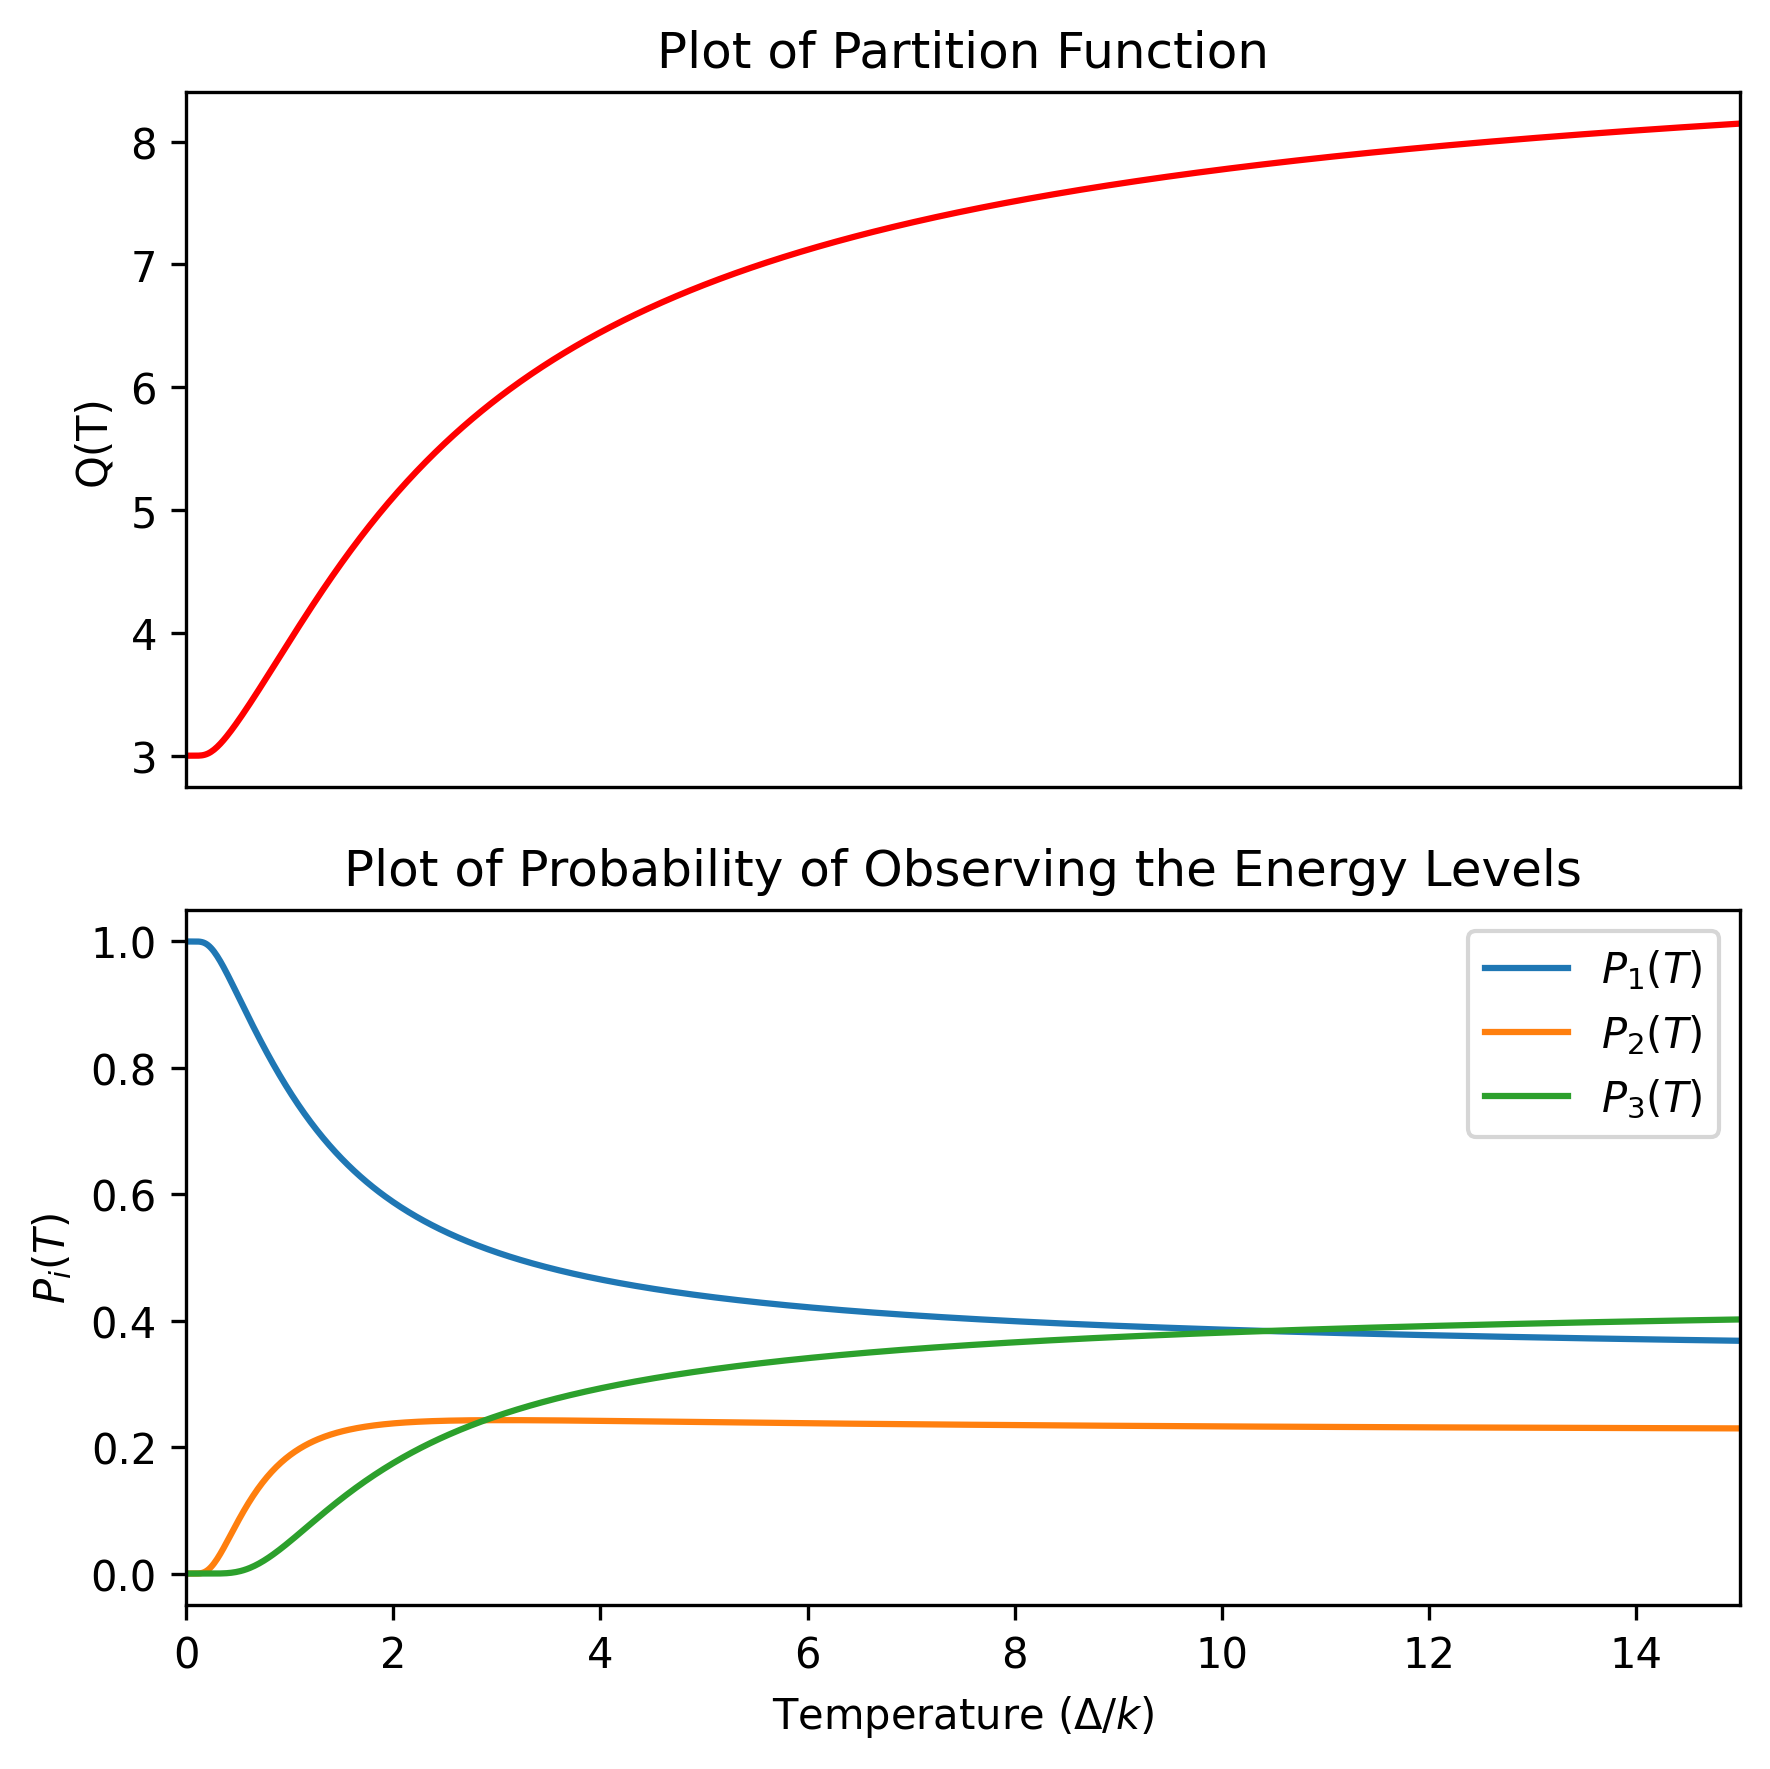

In [27]:
fig, (ax1, ax2) = plt.subplots(nrows=2)
fig.dpi = 300
fig.set_figheight(6)

ax1.plot(q7_temp, q7_q_sum, color="r", label="Q(T)")
ax1.set_ylabel("Q(T)")
ax1.set_title("Plot of Partition Function")
ax1.set_xlim(0, 15)
ax1.set_xticks([])

ax2.plot(q7_temp, q7_p1, label=r"$P_1(T)$")
ax2.plot(q7_temp, q7_p2, label=r"$P_2(T)$")
ax2.plot(q7_temp, q7_p3, label=r"$P_3(T)$")
ax2.legend()
ax2.set_ylabel(r"$P_i(T)$")
ax2.set_title("Plot of Probability of Observing the Energy Levels")
ax2.set_xlabel(r"Temperature ($\Delta / k$)")
ax2.set_xlim(0, 15)

plt.tight_layout()
plt.savefig("Question7a.png", dpi=200)
plt.show()

# Question 7b

In [28]:
# Compute average energy
q7_avg_e = 0 * q7_p1 + 1 * q7_p2 + 3 * q7_p3
# Compute variance in energy
q7_avg_e2 = 0 * q7_p1 + 1 * q7_p2 + 9 * q7_p3
q7_var_e = q7_avg_e2 - (q7_avg_e ** 2)
# Compute heat capacity
q7_c_v = q7_var_e / (q7_temp ** 2)

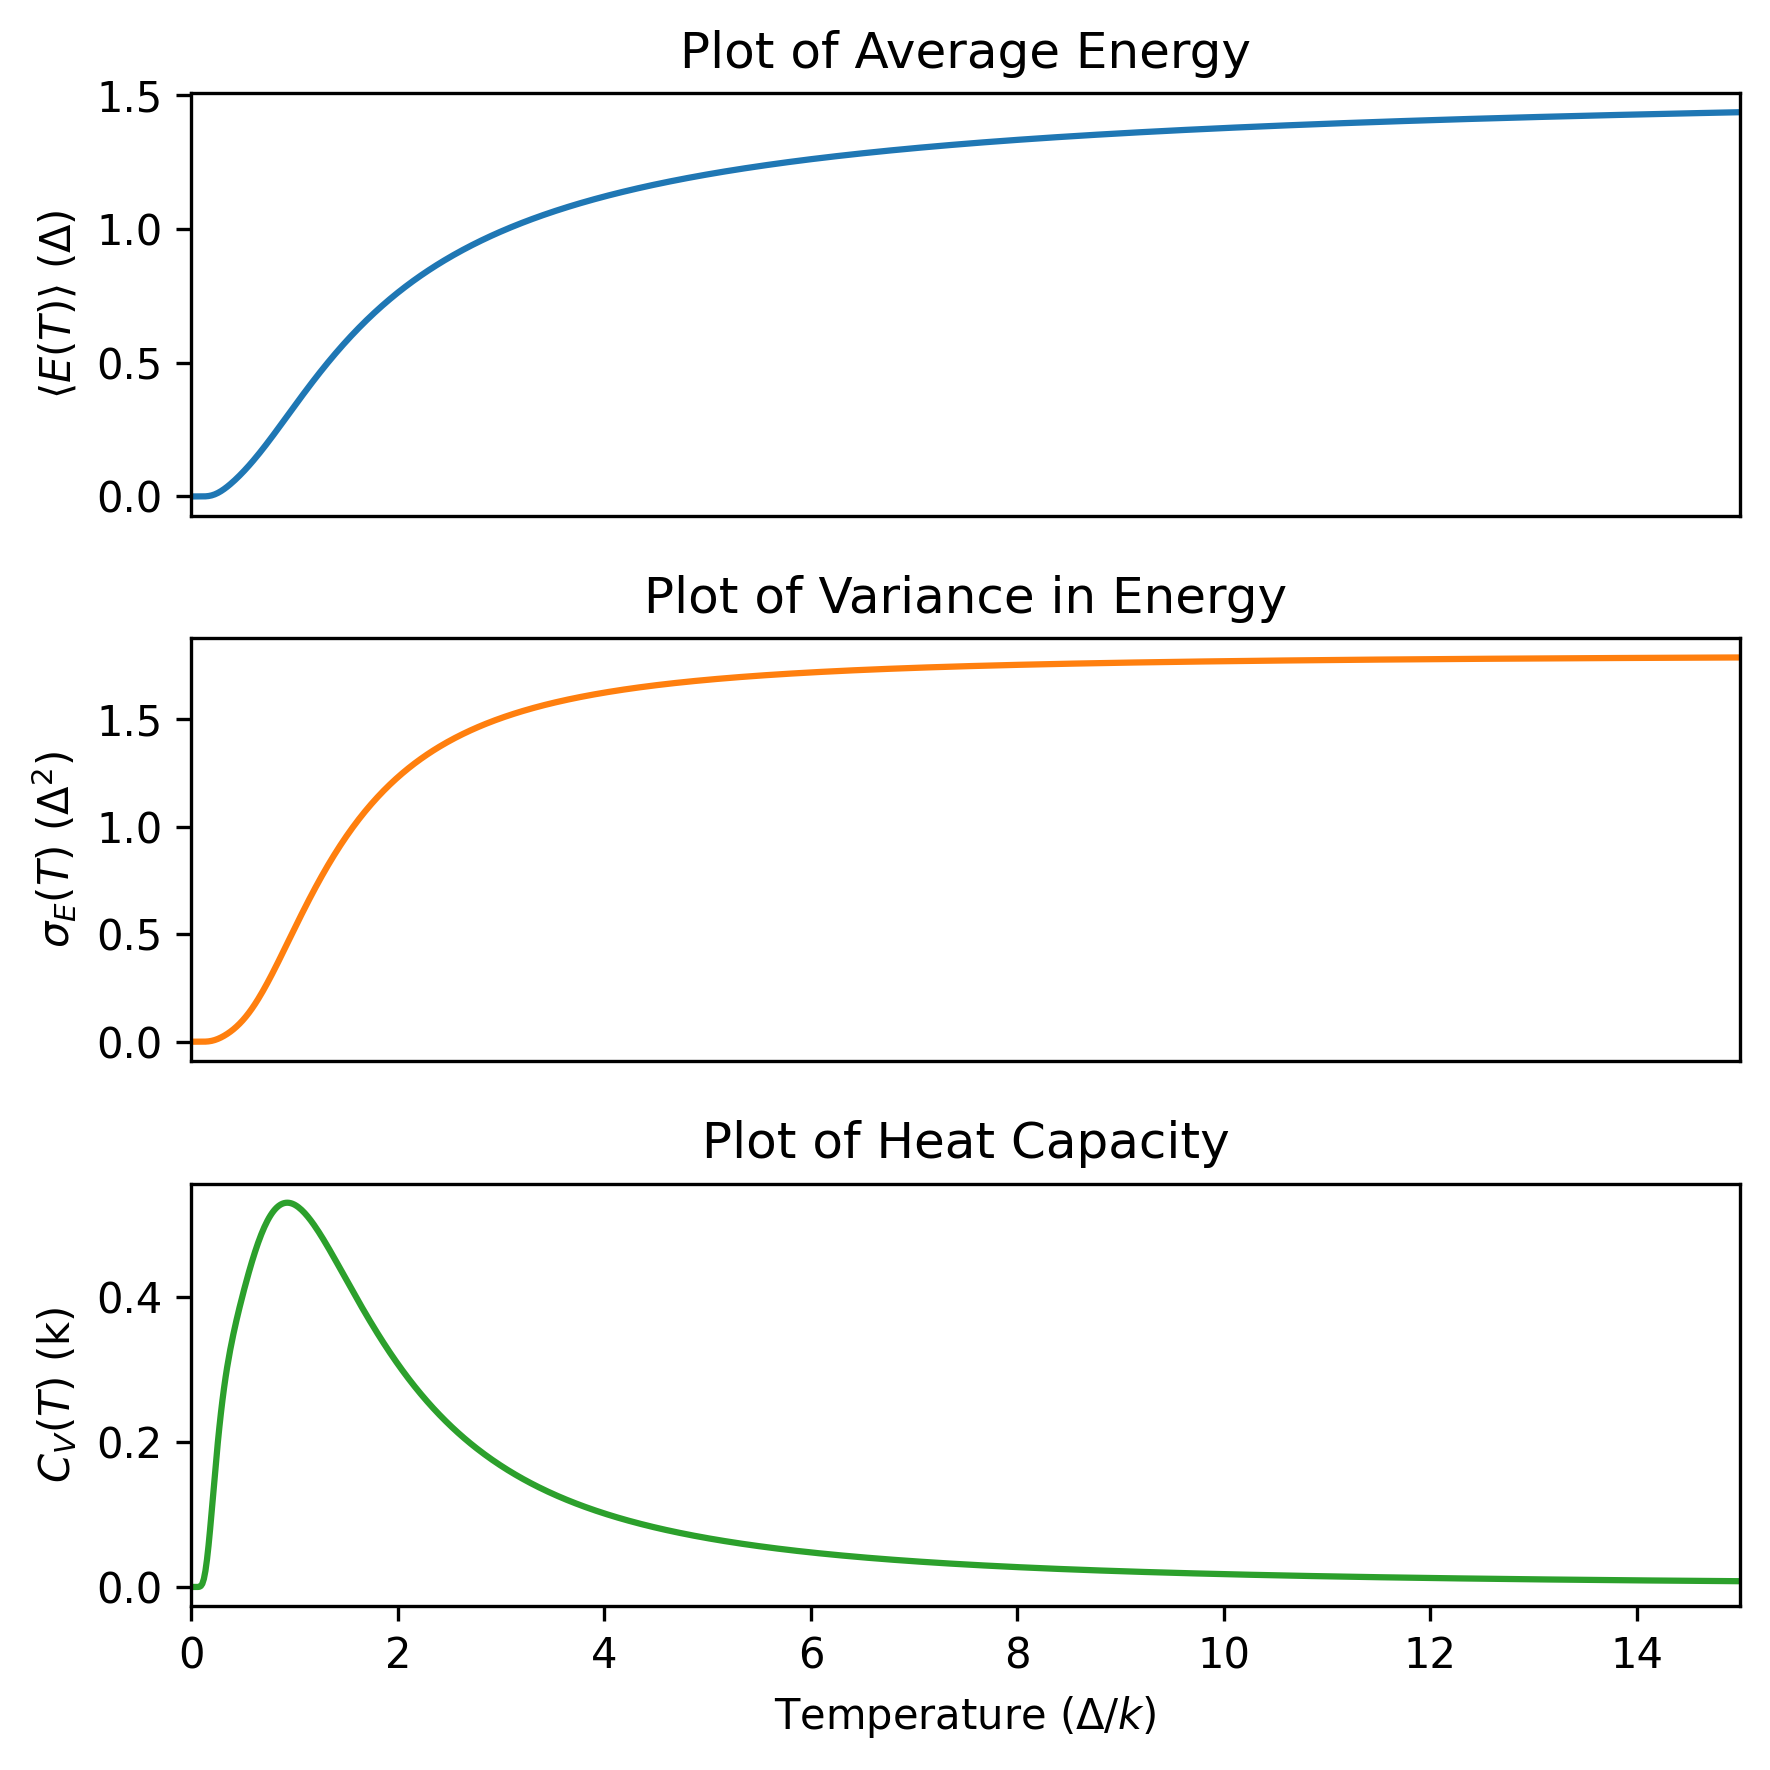

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3)
fig.dpi = 300
fig.set_figheight(6)

ax1.plot(q7_temp, q7_avg_e,  label="Average Energy")
ax1.set_ylabel(r"$\langle E(T) \rangle \ (\Delta)$")
ax1.set_title("Plot of Average Energy")
ax1.set_xlim(0, 15)
ax1.set_xticks([])

ax2.plot(q7_temp, q7_var_e, color='#ff7f0e', label="Variance")
ax2.set_ylabel(r"$\sigma_E (T) \ (\Delta^2)$")
ax2.set_title("Plot of Variance in Energy")
ax2.set_xlim(0, 15)
ax2.set_xticks([])

ax3.plot(q7_temp, q7_c_v, color='#2ca02c', label="Heat Capacity")
ax3.set_ylabel(r"$C_V (T)$ (k)")
ax3.set_xlabel(r"Temperature ($\Delta / k$)")
ax3.set_title("Plot of Heat Capacity")
ax3.set_xlim(0, 15)

plt.tight_layout()
plt.savefig("Question7b.png", dpi=200)
plt.show()

# Question 7c

In [30]:
# Change of zeros to very small values to avoid invalid logs
q7_p2[0], q7_p3[0] = 1e-20, 1e-20
# Compute entropy
q7_entropy = -(q7_p1 * np.log(q7_p1) + q7_p2 * np.log(q7_p2) + q7_p3 * np.log(q7_p3))

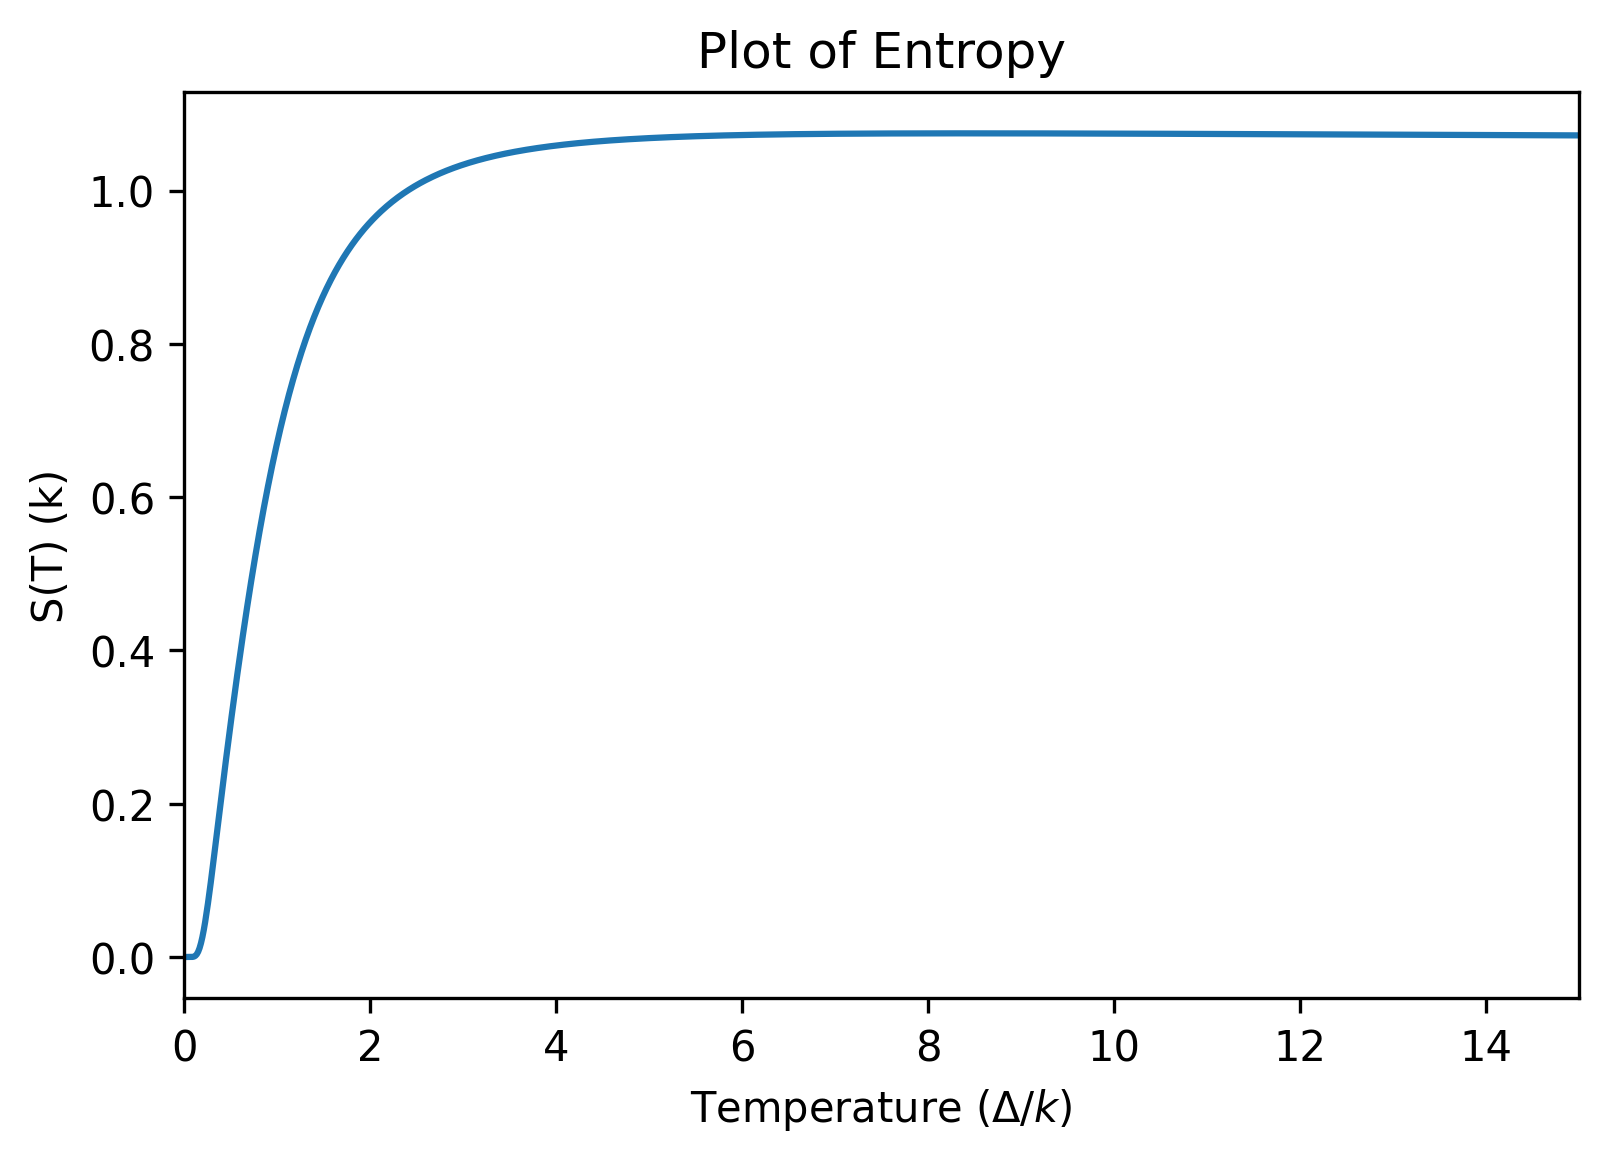

In [31]:
fig, ax = plt.subplots()
fig.dpi = 300

ax.set_xlabel(r"Temperature ($\Delta / k$)")
ax.set_ylabel("S(T) (k)")
ax.set_title("Plot of Entropy")
ax.set_xlim(0, 15)
ax.plot(q7_temp, q7_entropy, label="e1")

plt.savefig("Question7c.png", dpi=200)
plt.show()